# iPhone Accelerometer Data 

I found a cheap app in the AppStore that allows you to get accelerometer data from the iPhone. 
It's called VibSensor. The data is in .csv file format and you can email it to yourself but you have to get the paid version for $4.99. It's not bad. I can imagine you can do a lot of things with it. 

You can run the code with [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb#recent=true). You will need to upload your input file there. You can also use [mybinder](https://mybinder.org). I will need a little more time to make things run more smoothly.

# Acceleration plots

We need to import some python packages to be able to do the plots. It would be nice to learn python and incorporate it in your classes but you can also just run the code here and focus on Physics.

In [2]:
import pandas as pd
import datetime
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Our inputfile is called "Sample_Accelerometer_data.csv". It has four columns. The first column is the time, and the rest of the columns are the acceleration components along x, y, z. 

In [3]:
inputfile = "Sample_Accelerometer_data.csv"

df1 = pd.read_csv(inputfile)
df1.head() # show first few data points

,time (sec),X raw (m/s^2),Y raw (m/s^2),Z raw (m/s^2)
0,0.000000,0.292989,2.17557,9.73103
1,0.010039,-0.134673,2.03895,9.75767
2,0.020078,-0.161159,2.29498,9.68569
3,0.030117,0.301069,2.10569,9.47964
4,0.040156,0.554105,2.08040,9.31893


We're going to let the horizontal axis be time and we will plot x, y, and z components of the acceleration.

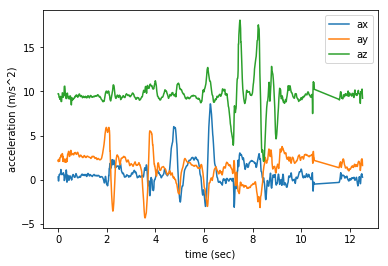

In [4]:
headers = ['time (sec)',
          'X raw (m/s^2)','Y raw (m/s^2)', 'Z raw (m/s^2)']

t = df1['time (sec)']
ax = df1['X raw (m/s^2)']
ay = df1['Y raw (m/s^2)']
az = df1['Z raw (m/s^2)']

plt.plot(t, ax, label='ax')
plt.plot(t, ay, label='ay')
plt.plot(t, az, label='az')

plt.legend()
plt.xlabel("time (sec)")
plt.ylabel("acceleration (m/s^2)")
plt.show()

## Velocity Plots 

Our accuracy for the velocity is limited by the data taking capacity. As you can see from the table, we only have acceleration data points every 0.01 s. 

We can try a very simple approach using the trapezoidal rule for numerical integration.

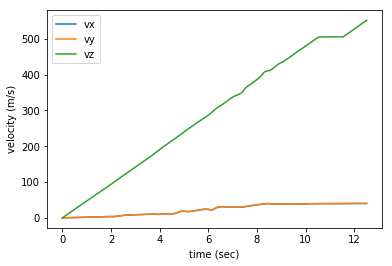

In [30]:
t = df1['time (sec)']

dt = 0.1
vx = [sum(ax[:i]) *dt *0.5 for i in range(len(ax))]
vy = [sum(ay[:i]) *dt *0.5 for i in range(len(ay))]
vz = [sum(az[:i]) *dt *0.5 for i in range(len(az))]


plt.plot(t, vx, label='vx')
plt.plot(t, vx, label='vy')
plt.plot(t, vz, label='vz')


plt.legend()
plt.xlabel("time (sec)")
plt.ylabel("velocity (m/s)")
plt.show()

You can also try to use the python package scipy that allows one to do [Simpson's Rule] (http://mathworld.wolfram.com/SimpsonsRule.html).